<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 5.1
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Este código implementa un modelo de red neuronal para la clasificación de datos de cáncer basados en el conjunto de datos de ejemplo "cancer1.xml", proveniente del software MEPx. El archivo contiene información estructurada en filas con atributos numéricos, donde la última columna representa la clasificación binaria de la enfermedad. Para este propósito, se emplea un perceptrón multicapa (MLP, Multi-Layer Perceptron) con arquitectura feedforward, en la cual la información fluye en una única dirección, desde la capa de entrada hasta la capa de salida, sin ciclos ni retroalimentación.

*   Capa de entrada con tantas neuronas como atributos tenga el conjunto de datos (en este caso, 9 características).
*   Primera capa oculta con 16 neuronas y activación ReLU.
*   Segunda capa oculta con 8 neuronas y activación ReLU.
*   Capa de salida con 1 neurona y activación sigmoide, encargada de producir una salida entre 0 y 1 para la clasificación binaria.


# **<> Desarrollo**

Se importan las librerías necesarias

In [ ]:
import pandas as pd  # Para manejar estructuras de datos
import xml.etree.ElementTree as ET  # Para manejar archivos XML
import numpy as np  # Para manejar operaciones numéricas
import tensorflow as tf  # Para construir la red neuronal
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
import matplotlib.pyplot as plt  # Para generar gráficos y visualizar los resultados del entrenamiento

Se extraen los valores de las filas del archivo XML, asegurando que cada una contenga diez elementos numéricos. Luego, se separan los datos en variables de entrada y salida, se dividen en conjuntos de entrenamiento y prueba, y se normalizan las características. Finalmente, se construye un modelo de red neuronal con dos capas ocultas usando la función de activación ReLU y una capa de salida con activación sigmoide para clasificación binaria. El modelo se entrena utilizando el optimizador Adam y la pérdida de entropía cruzada binaria.

In [ ]:
file_path = "/content/cancer1.xml" # Ruta del archivo XML (Debe estar subido en Google Colab)

# Función para leer el XML y convertirlo en un DataFrame
def parse_xml_to_dataframe(file_path):
    tree = ET.parse(file_path)  # Analizar el archivo XML
    root = tree.getroot()  # Obtener la raíz del XML
    data = []  # Lista para almacenar los datos extraídos

    for row in root.findall(".//row"):  # Buscar todas las filas dentro de cualquier nodo
        values = row.text.strip().split()  # Obtener los valores de la fila y separarlos
        if len(values) == 10:  # Asegurar solo filas completas
            data.append([float(v) for v in values])  # Convertir los valores a tipo float y agregarlos a la lista

    df = pd.DataFrame(data)  # Crear un DataFrame con los datos
    print(f"Total de filas cargadas: {df.shape[0]}")  # Imprimir el número total de filas cargadas
    return df  # Devolver el DataFrame

# Cargar datos
df = parse_xml_to_dataframe(file_path)  # Llamar a la función para leer el XML

# Verificar estructura del DataFrame
print(df.head())  # Imprimir las primeras 5 filas del DataFrame
print(f"Forma del DataFrame: {df.shape}")  # Imprimir la forma del DataFrame (filas, columnas)

# Asegurar que hay al menos 10 columnas
if df.shape[1] < 10:
    raise ValueError("El archivo XML no tiene suficientes columnas. Verifica la estructura del archivo.")  # Lanzar un error si hay menos de 10 columnas

# Separar variables de entrada y target
X = df.iloc[:, :-1].values  # Seleccionar todas las columnas excepto la última como variables de entrada
y = df.iloc[:, -1].values  # Seleccionar la última columna como variable objetivo (target)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# Normalización de los datos
scaler = StandardScaler()  # Crear un objeto para normalizar los datos
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)  # Transformar los datos de prueba con la misma escala

# Construcción del modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 16 neuronas y activación ReLU
    tf.keras.layers.Dense(8, activation='relu'),  # Segunda capa oculta con 8 neuronas y activación ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con una neurona y activación sigmoide para clasificación binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Configurar el optimizador y la función de pérdida

history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))  # Entrenar la red neuronal

Total de filas cargadas: 699
     0    1    2    3    4    5    6    7    8    9
0  0.2  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1  1.0
1  0.2  0.1  0.1  0.1  0.2  0.1  0.3  0.1  0.1  1.0
2  0.5  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1  1.0
3  0.5  0.4  0.6  0.8  0.4  0.1  0.8  1.0  0.1  0.0
4  0.5  0.3  0.3  0.1  0.2  0.1  0.2  0.1  0.1  1.0
Forma del DataFrame: (699, 10)
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6905 - loss: 0.6551 - val_accuracy: 0.7786 - val_loss: 0.4574
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8901 - loss: 0.3553 - val_accuracy: 0.9571 - val_loss: 0.2279
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9713 - loss: 0.1830 - val_accuracy: 0.9714 - val_loss: 0.1341
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9770 - loss: 0.0872 - val_accuracy: 0.9643 - val_loss: 0.1175
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0760 - val_accuracy: 0.9643 - val_loss: 0.1158
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9734 - loss: 0.0800 - val_accuracy: 0.9643 - val_loss: 0.1163
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.0733 - val_accuracy: 0.9643 - val_loss: 0.1172
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0469 - val_accuracy: 0.9643 - val_loss: 0.1184
Epo

Se crea la función plot_training_history(history) para generar gráficos que muestran la evolución de la pérdida y la precisión durante el entrenamiento de un modelo de red neuronal. Se extraen los valores de pérdida y precisión tanto del conjunto de entrenamiento como de validación a partir del historial proporcionado por TensorFlow. Luego, se crean dos gráficos, uno para la pérdida y otro para la precisión, con las épocas en el eje X y los valores correspondientes en el eje Y. Esto permite visualizar el rendimiento del modelo y detectar posibles problemas como sobreajuste o bajo rendimiento.

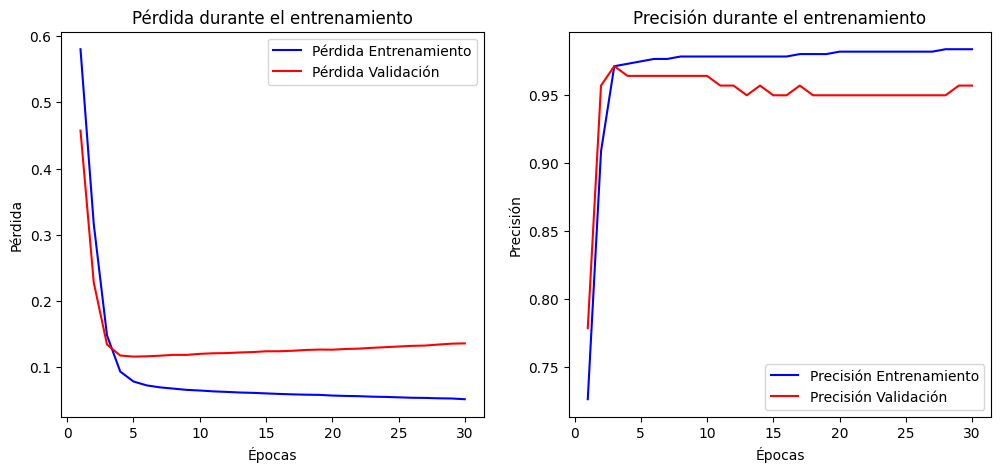

In [ ]:
# Función para graficar la precisión y la pérdida durante el entrenamiento
def plot_training_history(history):
    # Extraer los valores de la historia del entrenamiento
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    # Gráfico de pérdida
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Pérdida Entrenamiento')
    plt.plot(epochs, val_loss, 'r', label='Pérdida Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el entrenamiento')
    plt.legend()

    # Gráfico de precisión
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Precisión Entrenamiento')
    plt.plot(epochs, val_accuracy, 'r', label='Precisión Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Precisión durante el entrenamiento')
    plt.legend()

    plt.show()

# Llamar a la función para graficar los resultados
plot_training_history(history)

## **<> Test**

Se genera un bucle infinito en el que se crean vectores de prueba aleatorios con valores entre 0.0 y 1.0, asegurando que tengan un solo decimal. Estos vectores se normalizan utilizando el mismo escalador que se aplicó a los datos de entrenamiento antes de pasarlos al modelo para obtener predicciones. Luego, se imprimen los vectores de prueba junto con sus predicciones para evaluar el comportamiento del modelo. Finalmente, el usuario tiene la opción de ingresar un vector de características, repetir el proceso o salir del bucle.

In [ ]:
import numpy as np

while True:
    # Generar 10 vectores aleatorios de prueba
    random_test_vectors = np.random.randint(0, 11, size=(10, X_train.shape[1])) / 10

    # Aplicar la misma normalización usada en los datos de entrenamiento
    random_scaled_test_vectors = scaler.transform(random_test_vectors)

    # Obtener predicciones del modelo para los vectores de prueba
    predictions = model.predict(random_scaled_test_vectors)
    binary_predictions = (predictions > 0.5).astype(int)  # Convertir a 0 o 1 según el umbral de 0.5

    # Imprimir los vectores de prueba y sus predicciones
    print("Resultados de la prueba:")
    for i, (vector, prediction) in enumerate(zip(random_test_vectors, binary_predictions)):
        print(f"Persona {i+1}: Características {np.round(vector, 1)} -> {'Positivo' if prediction[0] == 1 else 'Negativo'}")

    while True:
        choice = input("\n¿Desea ingresar un vector de características manualmente? (y/n): ").strip().lower()

        if choice == 'y':
            try:
                user_input = input("Ingrese 9 números separados por espacio: ")
                user_vector = np.array([float(num) for num in user_input.split()])

                if len(user_vector) != 9:
                    raise ValueError("Debe ingresar exactamente 9 números.")

                # Redimensionar para cumplir con la entrada esperada por el modelo
                user_vector = user_vector.reshape(1, -1)

                # Aplicar la normalización
                user_scaled_vector = scaler.transform(user_vector)

                # Obtener la predicción del modelo
                user_prediction = model.predict(user_scaled_vector)
                user_binary_prediction = (user_prediction > 0.5).astype(int)

                # Mostrar el resultado
                print(f"Diagnóstico: {'Positivo' if user_binary_prediction[0][0] == 1 else 'Negativo'}\n")

            except ValueError as e:
                print(f"Error: {e}. Intente de nuevo.")

        elif choice == 'n':
            break  # Salir del bucle interno y volver a preguntar si desea realizar otra prueba

    retry = input("¿Desea realizar otra prueba con nuevos vectores aleatorios? (y/n): ").strip().lower()
    if retry != 'y':
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Resultados de la prueba:
Persona 1: Características [0.2 0.8 0.6 0.7 0.  0.1 0.2 0.  0.3] -> Negativo
Persona 2: Características [0.2 0.7 0.  0.1 0.6 0.8 0.8 0.  0.6] -> Negativo
Persona 3: Características [0.8 0.8 0.8 0.  0.1 0.9 0.2 0.9 1. ] -> Negativo
Persona 4: Características [0.4 0.4 0.1 0.4 0.1 0.5 0.7 0.2 0.5] -> Negativo
Persona 5: Características [0.9 0.3 0.3 0.2 0.1 1.  0.3 0.  0. ] -> Negativo
Persona 6: Características [0.2 0.1 0.6 0.6 0.6 0.5 1.  0.8 0.4] -> Negativo
Persona 7: Características [0.  0.  0.3 0.  0.7 0.5 0.1 0.7 0.3] -> Positivo
Persona 8: Características [1.  0.7 0.7 0.9 0.  1.  0.6 0.9 0.1] -> Negativo
Persona 9: Características [0.3 0.8 0.9 0.7 0.4 0.9 0.5 0.6 1. ] -> Negativo
Persona 10: Características [1.  0.9 0.9 0.3 0.4 0.6 1.  0.6 1. ] -> Negativo

¿Desea ingresar un vector de características manualmente? (y/n): n
¿Desea realizar otra prueba con nuevos vectores aleatorios? (y/n): y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 